In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/court-data/judges_clean/judges_clean.csv
/kaggle/input/court-data/acts_sections/acts_sections.csv
/kaggle/input/court-data/cases/cases/cases_2015.csv
/kaggle/input/court-data/cases/cases/cases_2012.csv
/kaggle/input/court-data/cases/cases/cases_2018.csv
/kaggle/input/court-data/cases/cases/cases_2013.csv
/kaggle/input/court-data/cases/cases/cases_2017.csv
/kaggle/input/court-data/cases/cases/cases_2010.csv
/kaggle/input/court-data/cases/cases/cases_2014.csv
/kaggle/input/court-data/cases/cases/cases_2016.csv
/kaggle/input/court-data/cases/cases/cases_2011.csv
/kaggle/input/court-data/keys/keys/type_name_key.csv
/kaggle/input/court-data/keys/keys/cases_district_key.csv
/kaggle/input/court-data/keys/keys/act_key.csv
/kaggle/input/court-data/keys/keys/disp_name_key.csv
/kaggle/input/court-data/keys/keys/purpose_name_key.csv
/kaggle/input/court-data/keys/keys/cases_state_key.csv
/kaggle/input/court-data/keys/keys/section_key.csv
/kaggle/input/court-data/keys/keys/cases_court_

### *Read 'cases_court_key.csv' into a dataFrame*

In [2]:
state_dist = pd.read_csv("/kaggle/input/court-data/keys/keys/cases_court_key.csv")
state_dist

,year,state_code,state_name,district_name,dist_code,court_no,court_name
0,2010,1,Maharashtra,Nandurbar,1,1,Chief Judcial Magistrate Nandurbar
1,2010,1,Maharashtra,Nandurbar,1,2,Civil Court Senior Division Nandurbar
2,2010,1,Maharashtra,Nandurbar,1,3,"DISTRICT AND SESSIONS COURT, NANDURBAR"
3,2010,1,Maharashtra,Nandurbar,1,4,Civil Court J.D. and J.M.F.C.Taloda
4,2010,1,Maharashtra,Nandurbar,1,5,Jt. Civil Court J.D. and J.M.F.C. Shahada
...,...,...,...,...,...,...,...
59423,2018,33,Ladakh,Kargil,1,2,Principal District Judge
59424,2018,33,Ladakh,Kargil,1,3,Chief Judicial Magistrate
59425,2018,33,Ladakh,Leh,2,1,Principal Session Judge
59426,2018,33,Ladakh,Leh,2,2,Principal District Judge


In [3]:
state_dist.drop_duplicates(subset=['state_name', 'district_name', 'court_no'], inplace=True, ignore_index=True)
state_dist = state_dist.sort_values(by=['state_code', 'dist_code', 'court_no'], ascending=(True, True, True), ignore_index=True)
state_dist.head(50)

,year,state_code,state_name,district_name,dist_code,court_no,court_name
0,2010,1,Maharashtra,Nandurbar,1,1,Chief Judcial Magistrate Nandurbar
1,2010,1,Maharashtra,Nandurbar,1,2,Civil Court Senior Division Nandurbar
2,2010,1,Maharashtra,Nandurbar,1,3,"DISTRICT AND SESSIONS COURT, NANDURBAR"
3,2010,1,Maharashtra,Nandurbar,1,4,Civil Court J.D. and J.M.F.C.Taloda
4,2010,1,Maharashtra,Nandurbar,1,5,Jt. Civil Court J.D. and J.M.F.C. Shahada
5,2010,1,Maharashtra,Nandurbar,1,6,Civil Court S.D. Shahada
6,2010,1,Maharashtra,Nandurbar,1,7,Additional District And Sessions Court Shahada
7,2010,1,Maharashtra,Nandurbar,1,8,"Civil Court, J.D. and J.M.F.C., Nawapur."
8,2010,1,Maharashtra,Nandurbar,1,9,"Civil Court J.D. and J.M.F.C., Akkalkuwa"
9,2010,1,Maharashtra,Nandurbar,1,10,"C.J.J.D. AND J.M.F.C., DHADGAON/AKRANI"


In [4]:
state_dist.drop(columns=['year'], inplace=True)
state_dist

,state_code,state_name,district_name,dist_code,court_no,court_name
0,1,Maharashtra,Nandurbar,1,1,Chief Judcial Magistrate Nandurbar
1,1,Maharashtra,Nandurbar,1,2,Civil Court Senior Division Nandurbar
2,1,Maharashtra,Nandurbar,1,3,"DISTRICT AND SESSIONS COURT, NANDURBAR"
3,1,Maharashtra,Nandurbar,1,4,Civil Court J.D. and J.M.F.C.Taloda
4,1,Maharashtra,Nandurbar,1,5,Jt. Civil Court J.D. and J.M.F.C. Shahada
...,...,...,...,...,...,...
6987,33,Ladakh,Kargil,1,2,Principal District Judge
6988,33,Ladakh,Kargil,1,3,Chief Judicial Magistrate
6989,33,Ladakh,Leh,2,1,Principal Session Judge
6990,33,Ladakh,Leh,2,2,Principal District Judge


In [5]:
state_dist.describe()

,state_code,dist_code,court_no
count,6992.000000,6992.000000,6992.000000
mean,10.535469,17.009868,11.052059
std,7.133715,13.551928,9.804622
min,1.000000,1.000000,1.000000
25%,4.000000,6.000000,4.000000
50%,10.000000,14.000000,8.000000
75%,15.000000,24.000000,15.000000
max,33.000000,76.000000,75.000000


## *Number of courts per state*

In [6]:
num_courts =pd.pivot_table(state_dist, index='state_name', values='court_no', aggfunc=['count']) 
num_courts

,count
,court_no
state_name,
Andhra Pradesh,329
Assam,183
Bihar,203
Chandigarh,3
Chhattisgarh,181
DNH at Silvasa,1
Delhi,46
Diu and Daman,2


In [7]:
num_courts.sum()

count  court_no    6992
dtype: int64

In [8]:
num_courts['%_of_courts'] = (num_courts[('count','court_no')]/6992)*100
num_courts

,count,%_of_courts
,court_no,
state_name,,
Andhra Pradesh,329,4.705378
Assam,183,2.617277
Bihar,203,2.903318
Chandigarh,3,0.042906
Chhattisgarh,181,2.588673
DNH at Silvasa,1,0.014302
Delhi,46,0.657895
Diu and Daman,2,0.028604


In [9]:
num_courts.drop(columns=[('count','court_no')], inplace=True)

In [10]:
num_courts

,%_of_courts
,
state_name,
Andhra Pradesh,4.705378
Assam,2.617277
Bihar,2.903318
Chandigarh,0.042906
Chhattisgarh,2.588673
DNH at Silvasa,0.014302
Delhi,0.657895
Diu and Daman,0.028604


## *Pie Chart Dipicting the percentage of courts for each state*

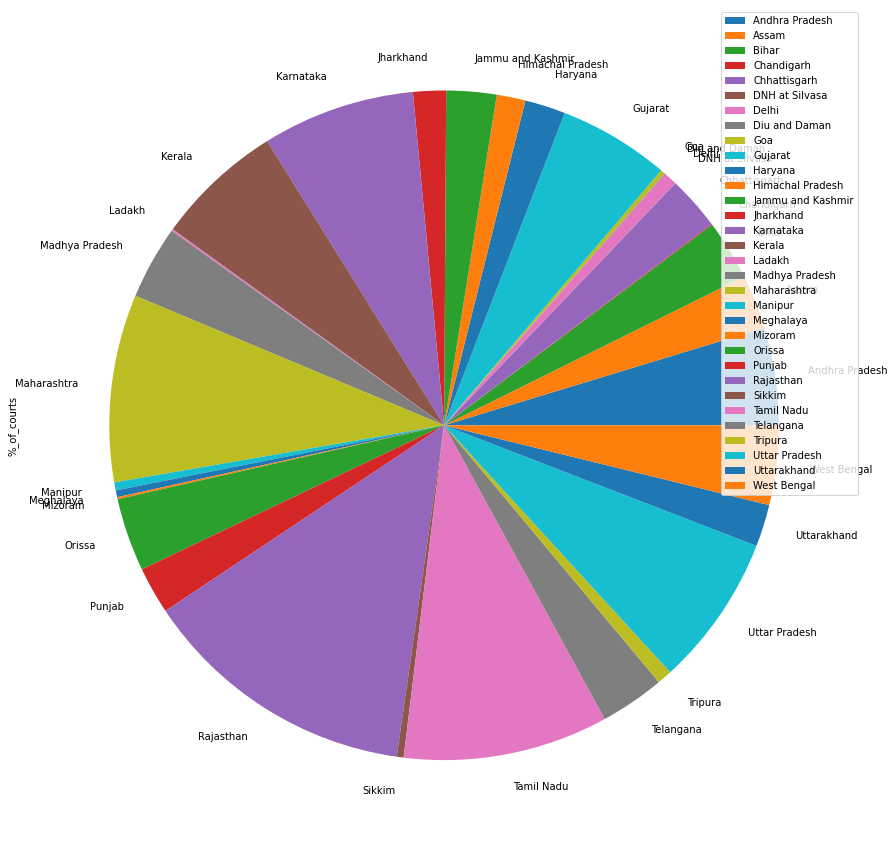

In [11]:
graph = num_courts.plot.pie(y='%_of_courts', figsize=(15, 20))
fig = graph.get_figure()
fig.savefig("/kaggle/working/Percentage_of_courts_state_wise.jpg")